<div class="alert alert-info">
<h1>Objectif du projet</h1>
Ce mini-projet vise à concevoir et comparer les performances de divers modèles de classification en appliquant les principes de l'apprentissage automatique à un ensemble de données. Ce processus itératif comprend plusieurs étapes essentielles : la compréhension des données, la préparation des données, la modélisation et l'évaluation. À travers ces étapes, nous explorons et entraînons différents algorithmes de classification, optimisons les modèles et les évaluons pour sélectionner celui offrant les meilleures performances prédictives. En combinant une analyse approfondie des données avec des techniques de modélisation avancées, Nous visons à fournir des solutions de classification robustes et précises pour développer un modèle permettant de prédire le niveau des « sautes d’humeur » (mood swings) d’une personne afin d’aider les médecins et les chercheurs à identifier les patients à risque de développer des problèmes de santé 
mentale.
</div>

<h1 style="color:red;">1. Data understanding (compréhension des données)</h1>

<h2 style="color:blue;">1.1. Chargement de l’ensemble des données</h2>

In [1]:
import pandas as pd
data = pd.read_csv("Mental Health Dataset.csv")


<h2 style="color:blue;">1.2. Affichage des données</h2>

In [2]:
#Affichage d'un aperçu des 10 premières instances de l’ensemble des données
data.head(10)

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
8,8/27/2014 12:18,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
9,8/27/2014 12:37,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


<h2 style="color:blue;">1.3. Description et analyse des données</h2>

<h3 style="color:green;">1.3.1 Affichage du volume et dimension de l'ensemble des données</h3>

In [3]:
data.shape

(292364, 17)

In [4]:
print(f"le dataset contient {data.shape[0]} enregistrements et "f"{data.shape[1]} colonnes")

# Pour conclure les nombres des carateristique , on compte le nombre du colonne - 1 
print(f"le dataset contient  {data.shape[1] - 1} caractéristiques.")

le dataset contient 292364 enregistrements et 17 colonnes
le dataset contient  16 caractéristiques.


<div class="alert alert-warning">
<strong>Note :</strong> La dimension d'un ensemble de données se réfère au nombre de colonnes de cet ensemble, tandis que le volume représente le nombre total d'instances ou d'enregistrements.
</div>

<h3 style="color:green;">1.3.2. Affichage du type des données et de la statistique descriptive</h3>

In [5]:
#Affichage des informations des colonnes
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [6]:
#Plus particulierement pour affecher les types on utilise l'attribut dtypes
data.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

=>Tous les données sont de type <storng>object</strong> :données catégorielles.

<div class="alert alert-info">
<h2>Statistiques descriptives</h2>
Les statistiques descriptives des données catégorielles fournissent un aperçu précieux de la répartition et de la fréquence des différentes catégories présentes dans un ensemble de données. Lorsqu'on examine ces statistiques, plusieurs éléments clés sont mis en lumière. Le comptage total, indiqué par <strong>Count</strong>, révèle le nombre total d'observations dans l'ensemble de données, tandis que le nombre de catégories uniques est représenté par <strong>Unique</strong>. La catégorie la plus fréquente, représentée par <strong>Top</strong>, donne un aperçu de la catégorie qui apparaît le plus souvent dans chaque colonne, avec sa fréquence correspondante illustrée par <strong>Freq</strong>. Ces statistiques permettent une compréhension rapide de la distribution et de la prévalence des différentes catégories, ce qui peut être essentiel pour orienter les analyses ultérieures et les prises de décision.
<div>

In [7]:
#Pour afficher les differents statistiques des caracteristiques on utilise la methode describe
data.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


<h1>Analyse et interprétation : </h1>
L'ensemble de données, composé de 292 364 échantillons répartis sur 17 colonnes, offre un aperçu détaillé de divers aspects des répondants. Parmi ces 17 colonnes, 16 représentent différentes caractéristiques des répondants, tandis qu'une seule représente la variable cible, notée "Mood_Swings". Les caractéristiques, toutes de type "object", indiquent que toutes les données sont catégorielles. Les valeurs les plus fréquentes dans chaque attribut révèlent des tendances telles qu'une prédominance masculine, une origine majoritairement américaine et une forte proportion de répondants non travailleurs indépendants. Cependant, cette constatation soulève la possibilité d'un biais dans l'ensemble de données selon certaines caractéristiques, ce qui doit être pris en compte dans l'analyse des résultats. Parallèlement, la présence de valeurs manquantes pour certains attributs, comme illustré par l'exemple de "self_employed" avec seulement 287 162 valeurs présentes sur 292 364, met en évidence la nécessité d'une gestion appropriée des données manquantes pour assurer la fiabilité des résultats ultérieurs.

<h2 style="color:blue;">1.4.Visualisation des données</h2>

<div class="alert alert-warning">
<strong>Note :</strong> Étant donné que toutes les données de notre ensemble de données sont de type catégoriel, les diagrammes tels que le Scatter Plot, l'histogramme et la boîte à moustaches sont généralement utilisés pour visualiser des données numériques. Par conséquent, nous avons choisi d'utiliser le diagramme à barres, qui est particulièrement adapté pour représenter des distributions catégorielles et des comptages, afin de mieux comprendre les tendances et les relations entre la variable cible et les attributs prédictifs de l’ensemble des données.
</div>

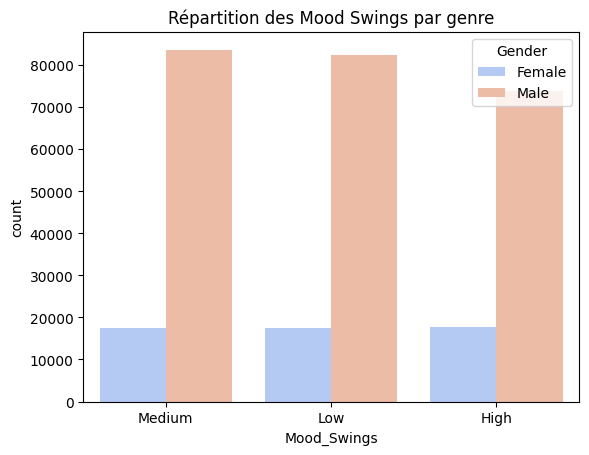

In [8]:
import seaborn as sns # bibliothèque de visualisation de données basée sur Matplotlib
import pandas as pd # la manipulation et l'analyse de données
import matplotlib.pyplot as plt # bibliothèque de visualisation de données

# Utilisation de la fonction countplot pour créer le diagramme en barres
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Gender')
# Ajouter un titre
plt.title('Répartition des Mood Swings par genre')
# Afficher le diagramme
plt.show()

=> Il est clair qu'une prépondérance significative d'individus masculins est observée parmi les divers niveaux de sauts d'humeur. Avec un nombre d'hommes de 239 850 sur un total de 292 364 individus, il est logique d'observer une plus grande proportion de sauts d'humeur chez les hommes. Toutefois, il est impératif d'exercer une prudence particulière dans l'interprétation de ces résultats et de reconnaître que la représentativité de l'échantillon peut affecter la fiabilité des conclusions tirées. Par la suite, nous allons effectuer un traitement spécifique pour ce type de colonne.

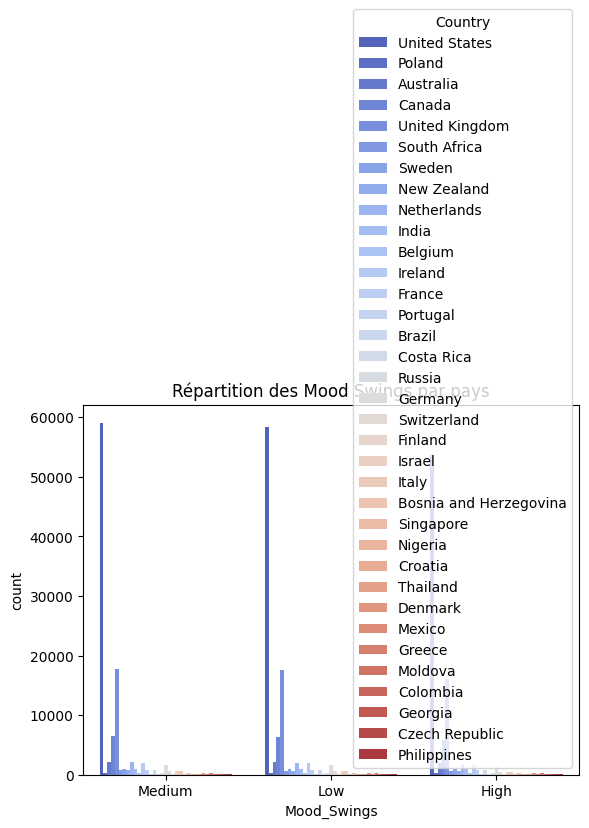

In [9]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Country')
plt.title('Répartition des Mood Swings par pays')
plt.show()

=>Il semble que les données indiquent une prévalence significative des sauts d'humeur chez les individus résidant aux États-Unis. Cependant, il est important de noter que cela peut être influencé par le fait que le nombre de personnes dans l'échantillon des États-Unis est considérablement plus élevé que le nombre total d'enregistrements dans les 35 pays. Avec 171,308 enregistrements provenant des États-Unis par rapport à un total de 292,364 enregistrements pour l'ensemble des 35 pays, la taille de l'échantillon des États-Unis pourrait jouer un rôle majeur dans ces observations. Par la suite, nous allons effectuer un traitement spécifique pour ce type de colonne.

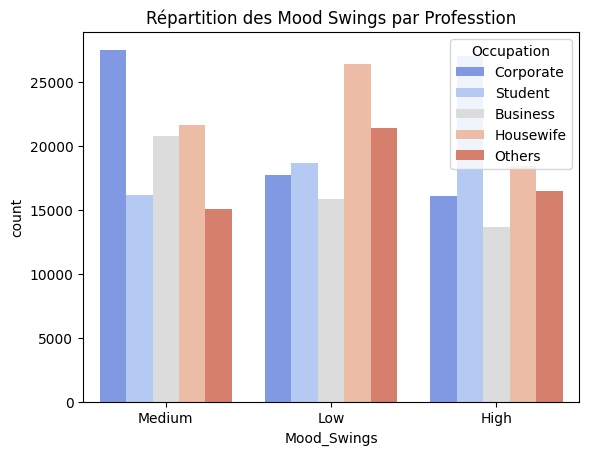

In [10]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Occupation')
plt.title('Répartition des Mood Swings par Professtion')
plt.show()

=>Nous observons des tendances intéressantes dans la répartition des niveaux de sauts d'humeur selon le statut professionnel des individus. Pour le niveau "Low", il est remarquable que la proportion de femmes au foyer soit dominante, suggérant peut-être une corrélation entre ce statut et un niveau inférieur de sauts d'humeur. En revanche, pour le niveau "Medium", ce sont les employés d'entreprise qui prédominent, ce qui pourrait indiquer des défis spécifiques liés à l'environnement professionnel. Enfin, pour le niveau "High", les étudiants constituent le groupe le plus représenté, soulignant peut-être les pressions et les exigences particulières auxquelles ils sont confrontés dans leur vie académique.

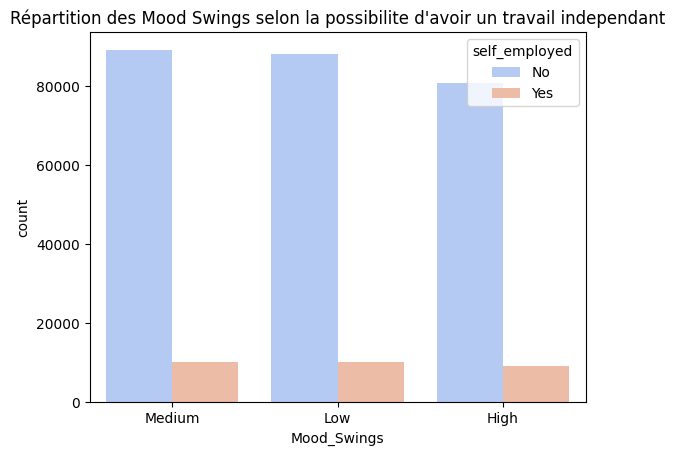

In [11]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='self_employed')
plt.title('Répartition des Mood Swings selon la possibilite d\'avoir un travail independant')
plt.show()

=>Il semble effectivement que les données indiquent une forte prédominance des personnes sans emploi indépendant parmi les différents niveaux de sauts d'humeur. Cependant, il est crucial de prendre en compte le nombre élevé de personnes sans emploi indépendant dans l'échantillon, qui est de 257,994 sur un total de 287,162 réponses disponibles. Cette observation souligne l'importance de considérer le contexte professionnel lors de l'analyse des variations émotionnelles, en reconnaissant que le résultat peut être influencé par la composition de l'échantillon en termes d'emploi. Par la suite, nous allons effectuer un traitement spécifique pour ce type de colonne.

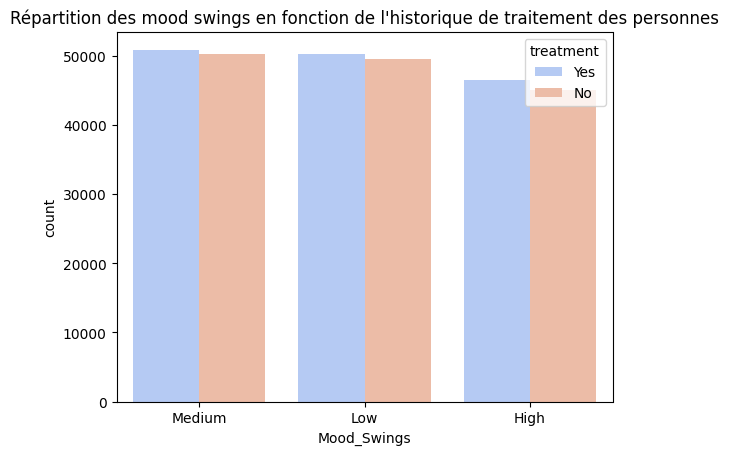

In [12]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='treatment')
plt.title('Répartition des mood swings en fonction de l\'historique de traitement des personnes')
plt.show()

=>Nous pouvons conclure que la proportion de personnes ayant déjà suivi un traitement mental est presque identique à celle n'ayant pas suivi de traitement, quel que soit le niveau de sauts d'humeur. Cette constatation suggère que l'expérience antérieure de traitement mental pourrait ne pas être un facteur déterminant dans la variation des sauts d'humeur dans cet échantillon spécifique.

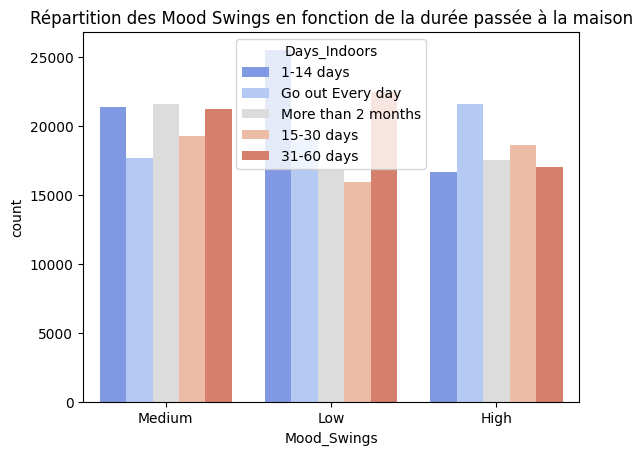

In [15]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Days_Indoors')
plt.title('Répartition des Mood Swings en fonction de la durée passée à la maison')
plt.show()

=>Nous pouvons conclure que les personnes qui restent à la maison entre 1 et 14 jours ont tendance à présenter un niveau de saut d'humeur bas. En revanche, ceux qui restent à la maison entre 1 et 14 jours, ou entre 31 et 60 jours, voire plus de deux mois, montrent généralement un niveau de saut d'humeur moyen. Enfin, ceux qui sortent chaque jour ont tendance à présenter le niveau de saut d'humeur le plus élevé.

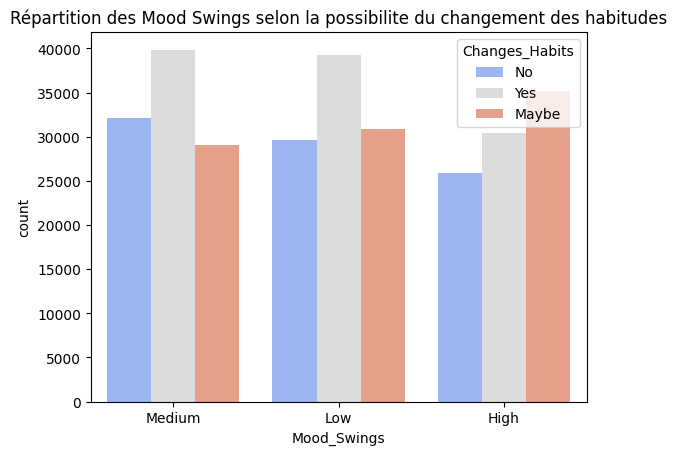

In [16]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Changes_Habits')
plt.title('Répartition des Mood Swings selon la possibilite du changement des habitudes')
plt.show()

=>Nous pouvons conclure que, pour les niveaux de sauts d'humeur Low et Medium, les répondants ayant remarqué un changement dans leurs habitudes dominent, tandis que pour le niveau High, ce sont les répondants qui ont répondu "Maybe" qui dominent. Cette observation suggère que la perception d'un changement dans les habitudes quotidiennes peut être un indicateur significatif de l'état émotionnel.

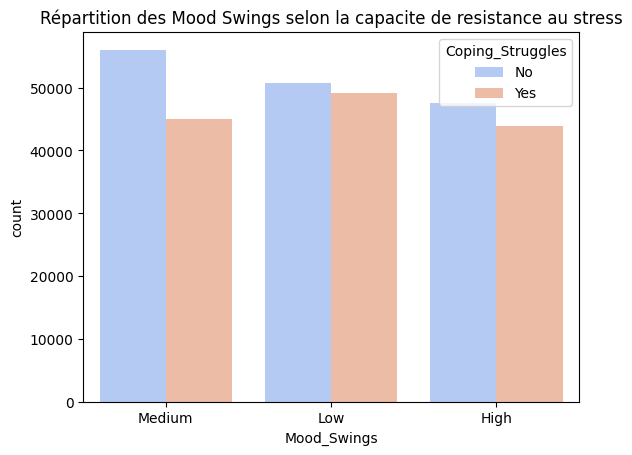

In [17]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Coping_Struggles')
plt.title('Répartition des Mood Swings selon la capacite de resistance au stress')
plt.show()

=>Nous pouvons  interpréter que quel que soit le niveau de saut d'humeur, la majorité des personnes qui dominent sont celles qui n'ont pas de difficultés à faire face au stress. Cela suggère que la capacité à faire face au stress peut ne pas avoir d'influence directe sur le niveau de saut d'humeur des individus.

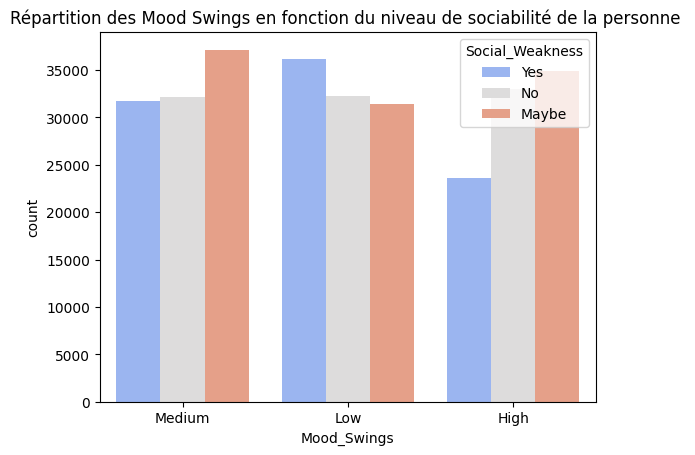

In [12]:
sns.countplot(x="Mood_Swings", data=data, palette='coolwarm', hue='Social_Weakness')
plt.title('Répartition des Mood Swings en fonction du niveau de sociabilité de la personne ')
plt.show()

=>En conclusion, puisque la majorité des réponses pour les hauts niveaux de sauts d'humeur sont "maybe", cela suggère que cette caractéristique n'a pas fourni des informations claires ou significatives. Il est difficile de tirer des conclusions précises sur la relation entre cette caractéristique et les hauts niveaux de sauts d'humeur.

<h1 style="color:red;">2. Nettoyage des données</h1>

<h2 style="color:blue;">2.1. Traitement des doublons des enregistrements</h2>

<h3 style="color:green;">2.1.1. Detection des doublons des enregistrements</h3>

In [9]:
import pandas as pd
# Afficher le nombre de doublons avant la suppression
nombre_doublons_avant = data.duplicated().sum()
# Afficher dans un tableau
tableau_doublons_avant = pd.DataFrame({"Nbre doublons avant  suppression": [nombre_doublons_avant]})
print(tableau_doublons_avant)


   Nbre doublons avant  suppression
0                              2313


<h3 style="color:green;">2.1.2. Suppression des doublons des enregistrements</h3>

In [10]:
# Supprimer les doublons
data_sans_doublons = data.drop_duplicates()
# Afficher le nombre de doublons après la suppression pour prouver leur disparition
nombre_doublons_apres = data_sans_doublons.duplicated().sum()
# Afficher dans un tableau
tableau_doublons_apres = pd.DataFrame({"Nbre doublons après  suppression": [nombre_doublons_apres]})
print(tableau_doublons_apres)

   Nbre doublons après  suppression
0                                 0


<h2 style="color:blue;">2.2. Traitement des valeurs Manquantes</h2>

<h3 style="color:green;">2.2.1. Detection des valeurs manquantes</h3>

In [11]:
# Afficher le nombre de valeurs manquantes pour chaque attribut avant le traitement
valeurs_manquantes_avant = data_sans_doublons.isnull().sum()
# Afficher dans un tableau
tableau_valeurs_manquantes_avant = pd.DataFrame({"Valeurs manquantes avant traitement": valeurs_manquantes_avant})
print(tableau_valeurs_manquantes_avant)

                         Valeurs manquantes avant traitement
Timestamp                                                  0
Gender                                                     0
Country                                                    0
Occupation                                                 0
self_employed                                           5193
family_history                                             0
treatment                                                  0
Days_Indoors                                               0
Growing_Stress                                             0
Changes_Habits                                             0
Mental_Health_History                                      0
Mood_Swings                                                0
Coping_Struggles                                           0
Work_Interest                                              0
Social_Weakness                                            0
mental_health_interview 

=> On peut constater clairement que seul l'attribut "self_employed" qui a des valeurs manquantes :5193 valeurs.

<h3 style="color:green;">2.2.2. Application du traitement</h3>

<div class="alert alert-info" >
Il existe plusieurs méthodes pour traiter les valeurs manquantes dans un ensemble de données. Pour les colonnes de type catégoriel, une approche courante est de remplacer les valeurs manquantes par la valeur la plus fréquente, également appelée mode. Une autre approche consiste à supprimer totalement les lignes ayant les valeurs manquantes. Dans notre cas, nous avons utilisé la méthode de remplacement par la valeur la plus fréquente.
</div>

In [12]:
# Traitement des valeurs manquantes en remplaçant par la valeur la plus fréquente dans chaque colonne
data_traite = data_sans_doublons.fillna(data_sans_doublons.mode().iloc[0])  # Remplacement par la valeur la plus fréquente
# Afficher le nombre de valeurs manquantes pour chaque attribut après le traitement
valeurs_manquantes_apres = data_traite.isnull().sum()
# Afficher dans un tableau
tableau_valeurs_manquantes_apres = pd.DataFrame({"Valeurs manquantes après traitement": valeurs_manquantes_apres})
print(tableau_valeurs_manquantes_apres)

                         Valeurs manquantes après traitement
Timestamp                                                  0
Gender                                                     0
Country                                                    0
Occupation                                                 0
self_employed                                              0
family_history                                             0
treatment                                                  0
Days_Indoors                                               0
Growing_Stress                                             0
Changes_Habits                                             0
Mental_Health_History                                      0
Mood_Swings                                                0
Coping_Struggles                                           0
Work_Interest                                              0
Social_Weakness                                            0
mental_health_interview 

=> On remarque qu'il y a plus de valeurs manquantes

<h1 style="color:red;">3. Transformation des données</h1>

<h2 style="color:blue;">3.1. Suppression des valeurs non pertinentes</h2>

<div class="alert alert-info" >
Nous avons remarqué la présence d'une colonne <strong>timestamp</strong> dans notre dataset, enregistrant la date et l'heure de chaque observation. Cette information n'a cependant pas d'impact direct sur l'apprentissage de notre modèle. Ainsi, nous pouvons choisir de ne pas l'inclure dans notre analyse, car elle n'ajoute pas de valeur significative à notre objectif d'apprentissage automatique. En plus de la suppression de la colonne timestamp, nous avons également identifié, lors de la phase de compréhension des données (notamment l'affichage des statistiques descriptives et la visualisation des données), la présence de trois colonnes qui affectent la fiabilité des résultats de nos modèles en raison du biais qu'elles provoquent (la dominance d'une valeur par rapport aux autres) : <strong>Gender </strong>, <strong>Country </strong>et <strong>Self-employed</strong>. Pour garantir une plus grande crédibilité de nos analyses, nous allons également supprimer ces colonnes.
</div>

In [13]:
data = data_traite.drop(columns=["Timestamp", "Gender", "self_employed","Country"])
data

,Occupation,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Corporate,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,Business,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,Business,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,Business,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,Business,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


<h2 style="color:blue;">3.2. Ajout des attributs</h2>

Après avoir examiné attentivement les données disponibles, il semble que les caractéristiques déjà incluses dans notre ensemble de données fournissent une vue assez complète des facteurs liés aux sauts d'humeur. Les attributs existants, tels que les antécédents familiaux de maladie mentale, les habitudes quotidiennes, les niveaux de stress perçus et d'autres, offrent une gamme diversifiée de données pour analyser les comportements émotionnels. Dans cette perspective, l'ajout d'autres caractéristiques pourrait être redondant et pourrait ne pas contribuer de manière significative à notre compréhension des sauts d'humeur

<h2 style="color:blue;">3.3. Normalisation des attributs</h2>

Dans notre cas, nous n'utiliserons pas la normalisation car notre ensemble de données ne contient pas d'attributs numériques. La normalisation est généralement appliquée aux attributs numériques pour les mettre à la même échelle, ce qui n'est pas applicable à nos attributs catégoriels, qui représentent des catégories discrètes et non des valeurs continues

<h2 style="color:blue;">3.4. Application de Transformation des données</h2>

<div class="alert alert-warning">
<strong>Note :</strong>Pour traiter les données catégorielles dans un ensemble de données, deux méthodes courantes sont l'encodage ordinal et l'encodage one-hot. L'encodage ordinal attribue des valeurs numériques en fonction de l'ordre ou de la fréquence des catégories, tandis que l'encodage one-hot crée de nouvelles colonnes binaires pour chaque catégorie. Lorsque les colonnes ont un grand nombre de catégories, comme "Country", l'encodage ordinal est souvent préféré car il conserve l'information tout en limitant la dimensionnalité, ce qui peut améliorer l'efficacité des modèles. Ainsi, pour les données telles que "Country", l'encodage ordinal est une approche judicieuse pour le prétraitement des données catégorielles.
</div>

In [14]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Créer un encodeur ordinal
encoder = OrdinalEncoder()

# Définir les colonnes à encoder par ordre de fréquence
#country_freq_order = data['Country'].value_counts().index.tolist()
occupation_freq_order = data['Occupation'].value_counts().index.tolist()
Days_Indoors_freq_order = data['Days_Indoors'].value_counts().index.tolist()

# Créer une copie du dataset pour éviter de modifier l'original
data_encoded = data.copy()
# Mapping personnalisé
custom_mapping = {
    "Occupation": {occupation: index for index, occupation in enumerate(occupation_freq_order)},
     "Days_Indoors": {Days_Indoors: index for index, Days_Indoors in enumerate(Days_Indoors_freq_order)},
    "family_history": {"No": 0, "Yes": 1},
    "treatment": {"No": 0, "Yes": 1},
    "Growing_Stress": {"No": 0, "Yes": 1,"Maybe":2},
    "Changes_Habits": {"No": 0, "Yes": 1, "Maybe": 2},
    "Mental_Health_History": {"No": 0, "Yes": 1, "Maybe": 2},
    "Coping_Struggles": {"No": 0, "Yes": 1},
    "Work_Interest": {"No": 0, "Yes": 1, "Maybe": 2},
    "Social_Weakness": {"No": 0, "Yes": 1, "Maybe": 2},
    "mental_health_interview": {"No": 0, "Yes": 1, "Maybe": 2},
    "care_options": {"No": 0, "Yes": 1, "Not sure": 2},
    "Mood_Swings": {"Low": 0, "Medium": 1, "High": 2}  
}

# Créer l'objet OrdinalEncoder avec le mapping personnalisé pour chaque colonne
encoders = {}
for col, mapping in custom_mapping.items():
    encoder = OrdinalEncoder(categories=[list(mapping.keys())] , handle_unknown='use_encoded_value', unknown_value=-1)
    encoder.fit([[val] for val in data[col]])
    encoders[col] = encoder

# Appliquer l'encodage ordinal à chaque colonne
for col, encoder in encoders.items():
    data_encoded[col] = encoder.transform([[val] for val in data[col]])

# Afficher les données encodées
data_encoded

,Occupation,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
1,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0
4,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,4.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
292360,4.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
292361,4.0,1.0,0.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
292362,4.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


In [15]:
nans = data_encoded.isna()
print(nans[nans].stack().index.tolist())

[]


<div class="alert alert-warning">
L'absence de valeurs dans la liste retournée indique qu'aucune valeur manquante n'a été détectée dans le DataFrame data_encoded après l'encodage des données. Cette absence de valeurs manquantes est une indication positive, car elle suggère que l'encodage s'est déroulé sans problème majeur et que les données sont complètes.
</div>

<h1 style="color:red;">4. Création et validation des modèles </h1>

<h2 style="color:blue;">4.1. Division de l’ensemble des données</h2>

<div class="alert alert-info" >
Pour commencer l'apprentissage, nous divisons les données en deux sous-ensembles : l’ensemble d’apprentissage (75% des données) et l’ensemble de test (25% des données). L’ensemble d’apprentissage est utilisé pour entraîner les modèles, tandis que l’ensemble de test permet d’évaluer leur performance sur des données non vues.
</div>

In [16]:
#Separation de la variable cible des autres donnes 
target_name="Mood_Swings"
target = data_encoded[target_name]
dataset = data_encoded.drop(columns=target_name)
dataset

,Occupation,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0
1,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
4,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
292359,4.0,1.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0
292360,4.0,1.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0
292361,4.0,1.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0
292362,4.0,1.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0


In [19]:
#division en ensemble de test 25% et 75% d'apprentissage
from sklearn.model_selection import train_test_split
test_size=0.25
data_train, data_test, target_train, target_test = train_test_split(dataset, target, test_size=0.25, random_state=10)


<h2 style="color:blue;">4.2. Le modèle K-NN</h2>

<h3 style="color:green;">4.2.1. Ajustement des Hyperparamètres</h3>

<div class="alert alert-info" >
Pour ajuster les hyperparamètres du modèle k-NN, notamment <strong>n_neighbors </strong>et <strong>metric </strong>, nous avons adopté une approche en deux étapes. Dans un premier temps, nous avons utilisé une méthode manuelle en utilisant des boucles imbriquées pour explorer différentes valeurs de n_neighbors et metric. Cette approche nous a fourni un aperçu approfondi de l'impact de ces hyperparamètres sur les performances du modèle. Cependant, pour garantir des résultats plus robustes et une recherche plus systématique des meilleures combinaisons d'hyperparamètres, nous avons ajouté une deuxième méthode. Nous avons ensuite utilisé la méthode Grid Search, qui automatise la recherche des meilleures combinaisons d'hyperparamètres en explorant de manière exhaustive l'espace des hyperparamètres. Cette approche nous a permis de confirmer les résultats obtenus par la méthode manuelle et d'optimiser efficacement les performances du modèle.</div>

<h4 style="color:#A52A2A;">Methode Manuelle :</h4>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

model = Pipeline([
    ("classifier", KNeighborsClassifier())
])

for n_neighbors in [5, 7, 8, 10]:
    for metric in ['euclidean', 'manhattan']:
        model.set_params(classifier__n_neighbors=n_neighbors)
        model.set_params(classifier__metric=metric)
        cv_results = cross_val_score(model, data_train, target_train)
        mean_score = np.mean(cv_results)
        std_score = np.std(cv_results)
        print(f"Accuracy score via cross-validation with n_neighbors={n_neighbors} and metric={metric}:\n"
              f"{mean_score:.3f} +/- {std_score:.3f}")

Accuracy score via cross-validation with n_neighbors=5 and metric=euclidean:
0.967 +/- 0.001
Accuracy score via cross-validation with n_neighbors=5 and metric=manhattan:
0.968 +/- 0.001
Accuracy score via cross-validation with n_neighbors=7 and metric=euclidean:
0.965 +/- 0.001
Accuracy score via cross-validation with n_neighbors=7 and metric=manhattan:
0.967 +/- 0.001
Accuracy score via cross-validation with n_neighbors=8 and metric=euclidean:
0.964 +/- 0.001
Accuracy score via cross-validation with n_neighbors=8 and metric=manhattan:
0.966 +/- 0.001
Accuracy score via cross-validation with n_neighbors=10 and metric=euclidean:
0.964 +/- 0.001
Accuracy score via cross-validation with n_neighbors=10 and metric=manhattan:
0.966 +/- 0.001


<h4 style="color:#A52A2A;">Methode GridSearch :</h4>

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_neighbors': (5, 7, 8, 10),
    'classifier__metric': ('euclidean', 'manhattan')}

model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=2, cv=5)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        KNeighborsClassifier(metric='manhattan',
                                                             n_neighbors=10))]),
             n_jobs=2,
             param_grid={'classifier__metric': ('euclidean', 'manhattan'),
                         'classifier__n_neighbors': (5, 7, 8, 10)})

In [22]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5}


<div class="alert alert-info" >
Les résultats indiquent que la distance de Manhattan semble légèrement meilleure que la distance euclidienne en termes d'exactitude moyenne pour toutes les valeurs de n_neighbors.En examinant les combinaisons spécifiques, la meilleure exactitude a été observée avec la distance de Manhattan et un nombre de voisins égal à 5.</div>

<h3 style="color:green;">4.2.2. Evaluation des Performances du Modèle k-NN Optimisé</h3>

<div >
Dans cette phase, nous évaluons les performances du modèle k-NN optimisé en utilisant une approche holistique. Après avoir ajusté ses hyperparamètres, incluant le nombre de voisins les plus proches et la mesure de distance, nous avons déterminé le modèle le plus performant. En plus d'évaluer ses performances à l'aide de mesures classiques telles que l'Accuracy, la Précision, le Rappel et le F1-score, nous allons également générer et analyser les courbes de Précision-Rappel et de ROC-AUC. Ces courbes fournissent une vue détaillée de la capacité du modèle à discriminer entre les classes positives et négatives à différents seuils de classification, ainsi que la relation entre précision et rappel. De plus, afin de mieux comprendre les prédictions du modèle, nous visualiserons la matrice de confusion sous forme d'une heatmap. Cette approche complète nous permettra d'obtenir une compréhension approfondie de la performance du modèle k-NN et de son aptitude à généraliser efficacement sur de nouvelles données.</div>

<h4 style="color:#A52A2A;">Visualisation des Prédictions avec la Matrice de Confusion (Heatmap) :</h4>

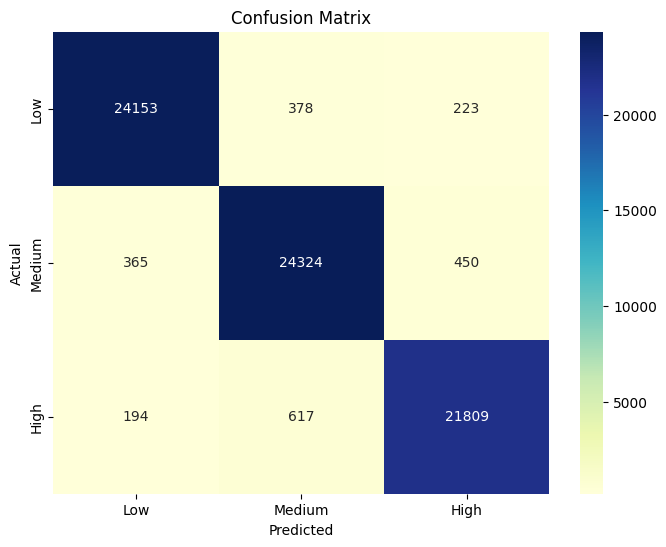

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le modèle KNeighborsClassifier avec les hyperparamètres optimaux
best_model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
best_model.fit(data_train, target_train)

# Faire des prédictions sur l'ensemble de test
predictions_Knn = best_model.predict(data_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(target_test, predictions_Knn)

# Afficher la matrice de confusion sous forme d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h4 style="color:#A52A2A;">Évaluation des Performances du Modèle k-NN :</h4>

In [18]:
# Calculer les différentes mesures de performances
accuracy_Knn = accuracy_score(target_test, predictions_Knn)
precision_Knn = precision_score(target_test, predictions_Knn, average='micro')
recall_Knn = recall_score(target_test, predictions_Knn, average='micro')
f1_Knn = f1_score(target_test, predictions_Knn, average='micro')

# Afficher les différentes mesures de performances
print(f'Accuracy: {accuracy_Knn:.3f}')
print(f'Precision: {precision_Knn:.3f}')
print(f'Recall: {recall_Knn:.3f}')
print(f'F1-score: {f1_Knn:.3f}')

Accuracy: 0.969
Precision: 0.969
Recall: 0.969
F1-score: 0.969


<h4 style="color:#A52A2A;">Les Courbes de Précision-Rappel et de ROC-AUC :</h4>

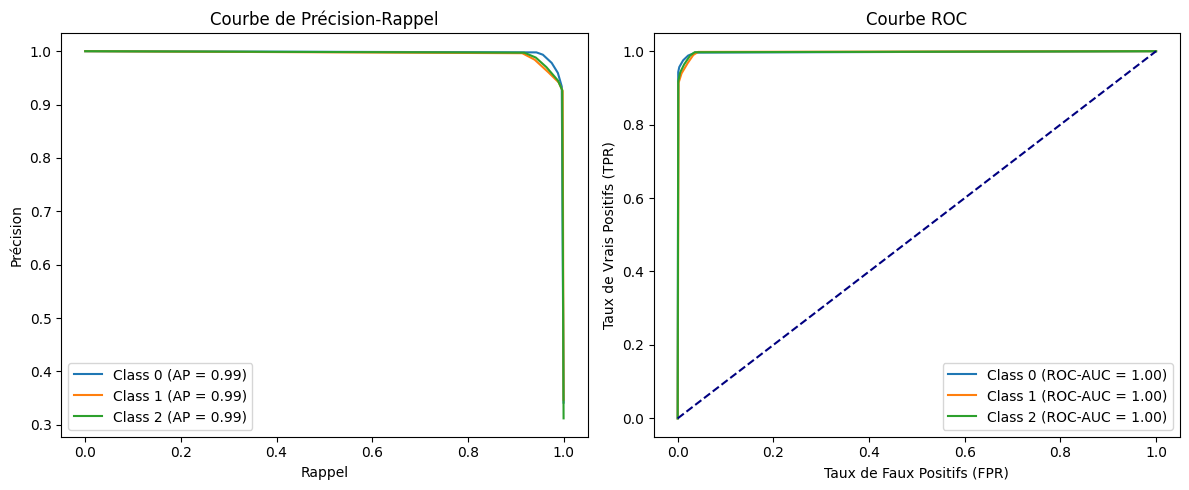

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import *
import numpy as np
# Convertir les étiquettes de la cible en un format binaire
y_test_bin = label_binarize(target_test, classes=np.unique(target_test))

# Ajuster le classificateur
best_model.fit(data_train, target_train)

# Faire des prédictions sur les probabilités pour chaque classe
y_score = best_model.predict_proba(data_test)

# Calculer la courbe de Précision-Rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3): 
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes de Précision-Rappel et de ROC-AUC pour chaque classe
plt.figure(figsize=(12, 5))

# Courbe de Précision-Rappel
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe de Précision-Rappel')
plt.legend(loc='best')

# Courbe ROC
plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<strong>Courbes de Rappel/Précision :</strong>

Les courbes de rappel/précision pour les trois classes se rapprochent toutes du coin supérieur droit du graphique, avec des valeurs élevées proches de 1 pour la précision et le rappel. Cela suggère que le modèle a une capacité élevée à classer correctement les instances positives tout en minimisant les faux positifs. Une précision et un rappel proches de 1 indiquent une forte capacité du modèle à effectuer des classifications précises et à récupérer un grand nombre d'instances positives.

<strong>Courbes ROC-AUC :</strong>

Les valeurs de l'Aire sous la Courbe ROC (ROC-AUC) pour toutes les classes sont proches de 1, indiquant une performance très élevée du modèle dans la capacité à discriminer entre les classes. Un ROC-AUC proche de 1 indique une forte capacité du modèle à classifier correctement les instances positives et négatives.

<strong>Conclusion</strong>
En résumé, les résultats suggèrent que le modèle présente une performance exceptionnelle dans la classification multiclasse, avec des valeurs élevées de précision, rappel et ROC-AUC pour toutes les classes. Cela indique que le modèle est très performant dans sa capacité à distinguer efficacement entre les différentes classes du problème.

<h2 style="color:blue;">4.3. Le modèle Arbres de décision </h2>

<h3 style="color:green;">4.3.1. Ajustement des Hyperparamètres</h3>

<div class="alert alert-info" >Pour optimiser les hyperparamètres du modèle d'Arbres de Décision, en particulier le critère de découpage <strong>criterion</strong> qui peut être défini par des fonctions telles que 'entropy' ou 'gini', nous avons suivi une méthode en deux étapes. Initialement, nous avons effectué une exploration manuelle en testant deux combinaisons différentes du critère de découpage à l'aide de boucles imbriquées. Cette approche nous a permis d'appréhender l'impact de ces hyperparamètres sur les performances du modèle. Par la suite, afin de garantir des résultats plus robustes et une exploration systématique des meilleures combinaisons d'hyperparamètres, nous avons adopté la méthode Grid Search. Cette approche automatisée nous a permis de valider les résultats obtenus par l'approche manuelle et d'améliorer significativement les performances du modèle d'Arbres de Décision en sélectionnant la combinaison optimale parmi les deux testées.</div>

<h4 style="color:#A52A2A;">Methode Manuelle </h4>

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
model2 = Pipeline([
    ("classifier", DecisionTreeClassifier())
])

for criterion in ['entropy', 'gini']:
    model2.set_params(classifier__criterion=criterion)
    cv_results = cross_val_score(model2, data_train, target_train)
    mean_score = np.mean(cv_results)
    std_score = np.std(cv_results)
    print(f"Accuracy score via cross-validation with criterion={criterion} \n"
    f"{mean_score:.3f} +/- {std_score:.3f}")

Accuracy score via cross-validation with criterion=entropy 
0.971 +/- 0.001
Accuracy score via cross-validation with criterion=gini 
0.971 +/- 0.001


<h4 style="color:#A52A2A;">Methode GridSearch </h4>

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model1 = Pipeline([
    ("classifier", DecisionTreeClassifier())
])
param_grid = {
    'classifier__criterion': ('entropy', 'gini')}
model_grid_search = GridSearchCV(model1, param_grid=param_grid, n_jobs=2, cv=5)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=2,
             param_grid={'classifier__criterion': ('entropy', 'gini')})

In [26]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__criterion': 'gini'}


<div class="alert alert-info" >
En conclusion, bien que les deux critères, l'entropie et l'indice de Gini, aient abouti à une accuracy égale dans notre cas, nous optons pour l'utilisation de <strong> Gini </strong> comme critère de choix pour la construction de l'arbre de décision d'après le resultat de l'attribut best_params de Grid_Search.
</div>

<h3 style="color:green;">4.3.2. Evaluation des Performances du Modèle Arbres de décision Optimisé</h3>

<div >Dans cette phase d'évaluation, nous scrutons attentivement les performances du modèle d'Arbres de Décision suite à son optimisation. Après avoir affiné ses hyperparamètres, notamment le critère de découpage (criterion) qui peut être spécifié par des fonctions telles que 'entropy' ou 'gini', notre objectif est d'identifier le modèle le plus performant. En plus des métriques classiques telles que l'Accuracy, la Précision, le Rappel et le F1-score pour évaluer ses performances, nous allons générer et analyser les courbes de Précision-Rappel et de ROC-AUC. Ces courbes fournissent une vue détaillée de la capacité du modèle à distinguer entre les classes positives et négatives à différents seuils de classification, ainsi que la relation entre la précision et le rappel. Pour une compréhension approfondie des prédictions du modèle, nous examinerons également la matrice de confusion sous forme de heatmap. Cette approche holistique nous permettra d'obtenir une vision exhaustive de la performance du modèle d'Arbres de Décision et de son aptitude à généraliser efficacement sur de nouvelles données.</div>

<h4 style="color:#A52A2A;">Visualisation des Prédictions avec la Matrice de Confusion (Heatmap) :</h4>

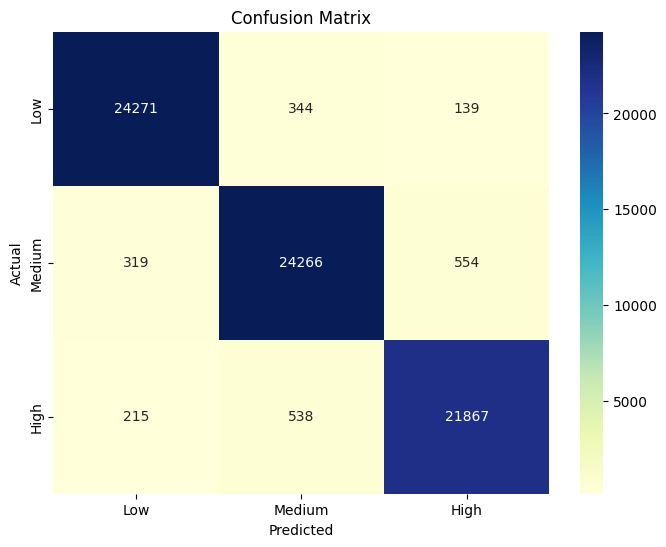

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraîner les modèles avec les hyperparamètres optimaux
best_model2 = DecisionTreeClassifier(criterion='gini')
best_model2.fit(data_train, target_train)

# Faire des prédictions sur l'ensemble de test
predictions_DT = best_model2.predict(data_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(target_test, predictions_DT)

# Afficher la matrice de confusion sous forme d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h4 style="color:#A52A2A;">Évaluation des Performances du Modèle Arbres de décision :</h4>

In [25]:
# Calculer les différentes mesures de performances
accuracy_DT = accuracy_score(target_test, predictions_DT)
precision_DT = precision_score(target_test, predictions_DT, average='micro')
recall_DT = recall_score(target_test, predictions_DT, average='micro')
f1_DT = f1_score(target_test, predictions_DT, average='micro')

# Afficher les différentes mesures de performances
print(f'Accuracy: {accuracy_DT:.3f}')
print(f'Precision: {precision_DT:.3f}')
print(f'Recall: {recall_DT:.3f}')
print(f'F1-score: {f1_DT:.3f}')

Accuracy: 0.971
Precision: 0.971
Recall: 0.971
F1-score: 0.971


<h4 style="color:#A52A2A;">Les Courbes de Précision-Rappel et de ROC-AUC :</h4>

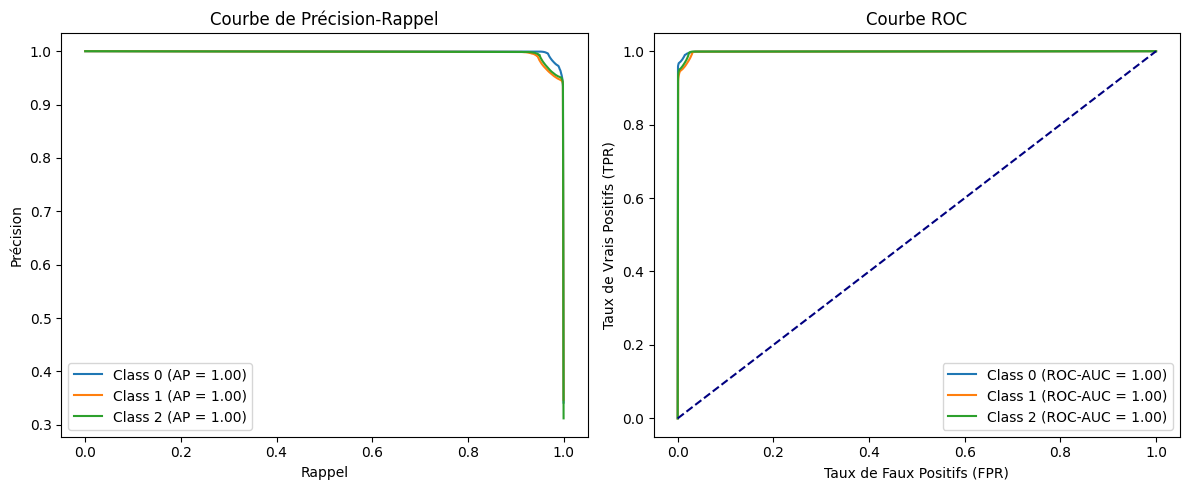

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Faire des prédictions sur les données de test
predictions_test = best_model2.predict(data_test)

# Convertir les étiquettes de la cible en un format binaire
y_test_bin = label_binarize(target_test, classes=np.unique(target_test))

# Faire des prédictions sur les probabilités pour chaque classe
y_score = best_model2.predict_proba(data_test)

# Calculer la courbe de Précision-Rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3): 
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes de Précision-Rappel et de ROC-AUC pour chaque classe
plt.figure(figsize=(12, 5))

# Courbe de Précision-Rappel
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe de Précision-Rappel')
plt.legend(loc='best')

# Courbe ROC
plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<strong>Conclusion</strong>
Les résultats observés mettent en lumière des performances similaires à celles du modèle précédent, démontrant une capacité exceptionnelle à discriminer entre les classes du problème.

<h2 style="color:blue;">4.4.Le modèle Régression logistique</h2>

<h3 style="color:green;">4.4.1. Ajustement des Hyperparamètres</h3>

<div class="alert alert-info" >Pour la Régression Logistique, nous suivrons la même approche que pour les deux premiers algorithmes. Nous commencerons par une exploration manuelle, testant deux combinaisons d'hyperparamètres : le nombre maximum d'itérations <strong>max_iter</strong> et l'algorithme d'optimisation <strong>solver</strong>, qui peut être choisi parmi 'lbfgs', 'liblinear', 'newton-cg', 'sag' ou 'saga'. Cette étape nous permettra de comprendre l'impact de ces hyperparamètres sur les performances du modèle. Ensuite, nous utiliserons la méthode Grid Search pour une recherche systématique des meilleures combinaisons. Cette approche nous permettra de valider les résultats de l'exploration manuelle et d'améliorer significativement les performances du modèle de Régression Logistique.</div>

<h4 style="color:#A52A2A;">Methode Manuelle</h4>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
model1 = Pipeline([
    ("classifier", LogisticRegression(multi_class='auto'))
])

for max_iter in [100, 200, 500, 1000]:
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']:
        model1.set_params(classifier__max_iter=max_iter)
        model1.set_params(classifier__solver=solver)
        cv_results = cross_val_score(model1, data_train, target_train)
        mean_score = np.mean(cv_results)
        std_score = np.std(cv_results)
        print(f"Accuracy score via cross-validation with max_iter={max_iter} and solver={solver}:\n"
              f"{mean_score:.3f} +/- {std_score:.3f}")

Accuracy score via cross-validation with max_iter=100 and solver=lbfgs:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=100 and solver=liblinear:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=100 and solver=newton-cg:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=100 and solver=sag:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=100 and solver=saga:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=200 and solver=lbfgs:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=200 and solver=liblinear:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=200 and solver=newton-cg:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=200 and solver=sag:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=200 and solver=saga:
0.404 +/- 0.001
Accuracy score via cross-validation with max_iter=500 and solver=lbfgs:
0.404 +/- 0.001
Accuracy score via cro

<h4 style="color:#A52A2A;">Methode GridSearch</h4>

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__max_iter': (100, 200, 500, 1000),
    'classifier__solver': ('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga')}

model_grid_search = GridSearchCV(model1, param_grid=param_grid, n_jobs=2, cv=5)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           solver='saga'))]),
             n_jobs=2,
             param_grid={'classifier__max_iter': (100, 200, 500, 1000),
                         'classifier__solver': ('lbfgs', 'liblinear',
                                                'newton-cg', 'sag', 'saga')})

In [29]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}


In [30]:
best_model_LR = model_grid_search.best_estimator_

<div class="alert alert-info" >
Après avoir testé différentes combinaisons de valeurs pour les hyperparamètres de la régression logistique, nous avons constaté que quelle que soit la valeur de max_iter, le solver 'liblinear' a produit les meilleures performances en termes d'accuracy. Cela suggère que l'algorithme d'optimisation utilisé par 'liblinear' est efficace pour notre ensemble de données spécifique. De plus, en observant les performances, nous avons constaté que même avec une valeur relativement faible de max_iter (par exemple 100), le solver <strong>liblinear</strong> a toujours convergé vers une solution satisfaisante, fournissant ainsi un compromis efficace entre précision et temps d'entraînement. Par conséquent, nous choisirons la combinaison de paramètres avec le solver 'liblinear' et une valeur minimale de max_iter, soit <strong>100</strong>, pour entraîner notre modèle final, car elle offre la meilleure précision tout en conservant des temps d'entraînement raisonnables.
</div>

<h3 style="color:green;">4.4.2. Evaluation des Performances du Modèle régression logistique Optimisé</h3>

Dans cette phase, nous appliquerons une méthode similaire pour évaluer les performances du modèle de Régression Logistique. Après avoir ajusté ses hyperparamètres, y compris le nombre maximum d'itérations (max_iter) et l'algorithme d'optimisation (solver), notre objectif est de sélectionner le modèle le plus performant. Nous utiliserons des métriques standard telles que l'Accuracy, la Précision, le Rappel et le F1-score pour évaluer ses performances. En outre, nous examinerons les courbes de Précision-Rappel et de ROC-AUC pour une meilleure compréhension de sa capacité à discriminer entre les classes positives et négatives. Enfin, nous analyserons la matrice de confusion pour évaluer les prédictions du modèle de manière plus détaillée. Cette approche nous permettra d'obtenir une vision globale de la performance de la Régression Logistique et de son aptitude à généraliser sur de nouvelles données.

<h4 style="color:#A52A2A;">Visualisation des Prédictions avec la Matrice de Confusion (Heatmap) :</h4>

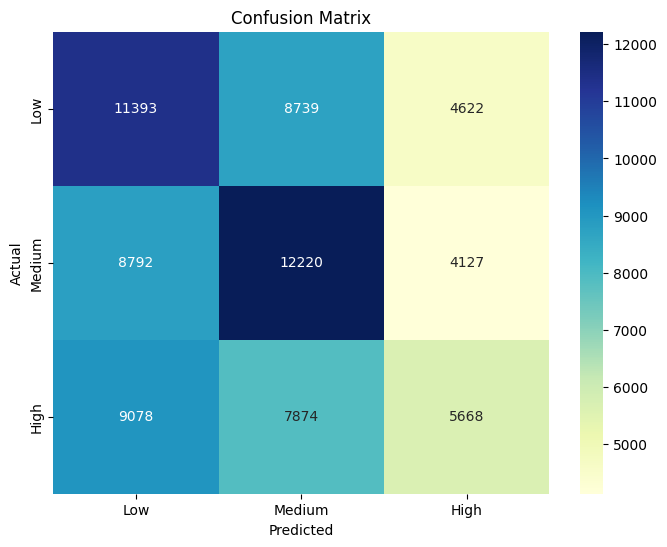

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraîner les modèles avec les hyperparamètres optimaux

best_model_LR.fit(data_train, target_train)

# Faire des prédictions sur l'ensemble de test
predictions_LR = best_model_LR.predict(data_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(target_test, predictions_LR)

# Afficher la matrice de confusion sous forme d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h4 style="color:#A52A2A;">Évaluation des Performances du Modèle régression logistique :</h4>

In [35]:
# Calculer les différentes mesures de performances
accuracy_LR = accuracy_score(target_test, predictions_LR)
precision_LR = precision_score(target_test, predictions_LR, average='micro')
recall_LR = recall_score(target_test, predictions_LR, average='micro')
f1_LR = f1_score(target_test, predictions_LR, average='micro')

# Afficher les différentes mesures de performances
print(f'Accuracy: {accuracy_LR:.3f}')
print(f'Precision: {precision_LR:.3f}')
print(f'Recall: {recall_LR:.3f}')
print(f'F1-score: {f1_LR:.3f}')

Accuracy: 0.404
Precision: 0.404
Recall: 0.404
F1-score: 0.404


<h4 style="color:#A52A2A;">Les Courbes de Précision-Rappel et de ROC-AUC :</h4>

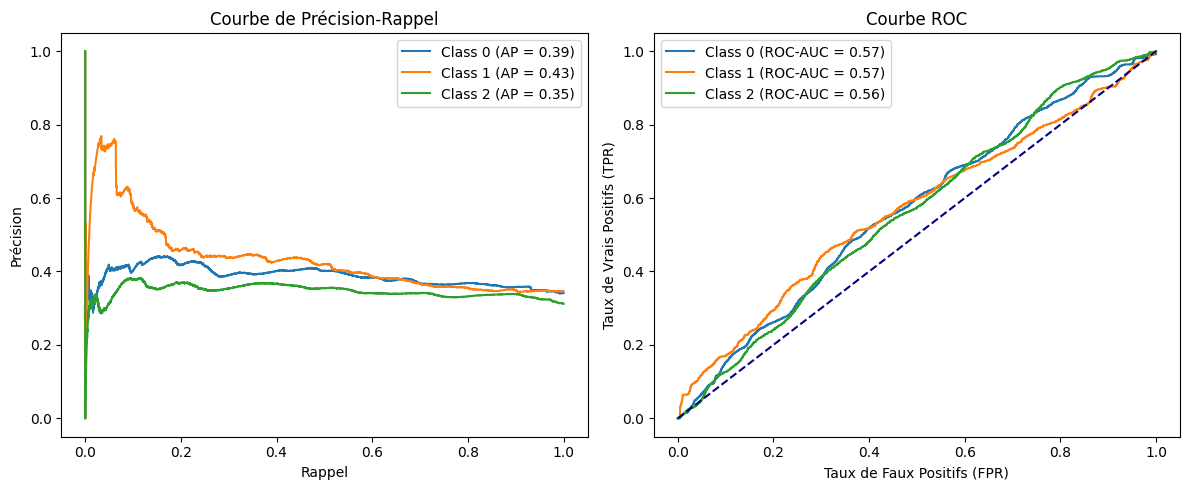

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import *
# Convertir les étiquettes de la cible en un format binaire
y_test_bin = label_binarize(target_test, classes=np.unique(target_test))

# Créer un classificateur One-vs-All avec le meilleur modèle


# Ajuster le classificateur
best_model_LR.fit(data_train, target_train)

# Faire des prédictions sur les probabilités pour chaque classe
y_score = best_model_LR.predict_proba(data_test)

# Calculer la courbe de Précision-Rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3): 
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes de Précision-Rappel et de ROC-AUC pour chaque classe
plt.figure(figsize=(12, 5))

# Courbe de Précision-Rappel
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe de Précision-Rappel')
plt.legend(loc='best')

# Courbe ROC
plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<strong>1-Courbes de Rappel/Précision :</strong>
Pour la courbe de précision/rappel, les valeurs moyennes de précision pour les trois classes sont faibles, avoisinant environ 0,4. Cette constatation suggère que le modèle rencontre des difficultés à classifier correctement les instances positives tout en minimisant les faux positifs. Une précision moyenne aussi basse indique une capacité limitée du modèle à effectuer des classifications précises pour toutes les classes.

<strong>2-Courbes ROC-AUC :</strong>
En ce qui concerne la courbe ROC-AUC, les valeurs observées sont proches de 0,5 pour toutes les classes. Cela suggère que le modèle se base sur des prédictions aléatoires, ce qui signifie qu'il ne parvient pas à discriminer efficacement entre les classes et à identifier les instances positives correctement.

<strong>Conclusion</strong>
En conclusion, ces observations soulignent une performance faible du modèle dans la classification multiclasse. Les faibles valeurs de précision moyenne et d'AUC-ROC indiquent des difficultés à effectuer des prédictions précises et discriminantes pour toutes les classes du problème.

<h2 style="color:blue;">4.5. Le modèle Support Vector Machines </h2>

<h3 style="color:green;">4.5.1. Ajustement des Hyperparamètres</h3>

<div class="alert alert-info" >Pour le modèle des Machines à Vecteurs de Support (SVM), nous adopterons une approche similaire à celle des précédents algorithmes. Nous commencerons par une exploration manuelle, testant deux combinaisons d'hyperparamètres : le noyau <strong>kernel</strong>, qui peut être choisi parmi 'linear', 'poly', 'rbf' ou 'sigmoid', et le paramètre de régularisation <strong>C</strong>, avec des valeurs possibles de 100, 10, 1.0, 0.1 et 0.001. Cette étape nous permettra de comprendre l'impact de ces hyperparamètres sur les performances du modèle. Ensuite, nous utiliserons la méthode Grid Search pour une recherche systématique des meilleures combinaisons. Cette approche nous permettra de valider les résultats de l'exploration manuelle et d'améliorer significativement les performances du modèle SVM.</div>

<h4 style="color:#A52A2A;">Methode Manuelle</h4>

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np


model3 = Pipeline([
    ("classifier", SVC(max_iter=30000))
])


# Boucle sur les hyperparamètres
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [100, 10, 1.0, 0.1, 0.001]:
        model3.set_params(classifier__C=C, classifier__kernel=kernel)
        cv_results = cross_val_score(model3, data_train_20, target_train_20, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_results)
        std_score = np.std(cv_results)
        print(f"Accuracy score via cross-validation with kernel={kernel} and C={C}:\n" f"{mean_score:.3f} +/- {std_score:.3f}")

In [18]:
df_20 = data_encoded.sample(frac=0.2, random_state=42)

target_name="Mood_Swings"
target_20= df_20[target_name]
dataset_20 = df_20.drop(columns=target_name)
dataset_20


data_train_20, _, target_train_20, _ = train_test_split(
    dataset_20, target_20, train_size=0.75, random_state=10)


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np


model3 = Pipeline([
    ("classifier", SVC())
])


# Boucle sur les hyperparamètres
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [100, 10, 1.0, 0.1, 0.001]:
        model3.set_params(classifier__C=C, classifier__kernel=kernel)
        cv_results = cross_val_score(model3, data_train_20, target_train_20, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_results)
        std_score = np.std(cv_results)
        print(f"Accuracy score via cross-validation with kernel={kernel} and C={C}:\n" f"{mean_score:.3f} +/- {std_score:.3f}")

Accuracy score via cross-validation with kernel=linear and C=100:
0.398 +/- 0.005


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np


model3 = Pipeline([
    ("classifier", SVC())
])


# Boucle sur les hyperparamètres
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [100, 10, 1.0, 0.1, 0.001]:
        model3.set_params(classifier__C=C, classifier__kernel=kernel)
        cv_results = cross_val_score(model3, data_train_20, target_train_20, cv=5, scoring='accuracy')
        mean_score = np.mean(cv_results)
        std_score = np.std(cv_results)
        print(f"Accuracy score via cross-validation with kernel={kernel} and C={C}:\n"
              f"{mean_score:.3f} +/- {std_score:.3f}")


Accuracy score via cross-validation with kernel=linear and C=100:
0.398 +/- 0.005
Accuracy score via cross-validation with kernel=linear and C=10:
0.399 +/- 0.005
Accuracy score via cross-validation with kernel=linear and C=1.0:
0.398 +/- 0.004
Accuracy score via cross-validation with kernel=linear and C=0.1:
0.398 +/- 0.005
Accuracy score via cross-validation with kernel=linear and C=0.001:
0.400 +/- 0.002


<h4 style="color:#A52A2A;">Methode GridSearch</h4>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import numpy as np


# Pipeline avec SVC
model3 = Pipeline([
    ("classifier", SVC())
])

# Paramètres pour GridSearchCV
param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__C': [100, 10, 1.0, 0.1, 0.01]
}

# GridSearchCV avec validation croisée 5-fold
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(data_train, target_train)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

In [ ]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

<h3 style="color:green;">4.5.2. Evaluation des Performances du Modèle Arbres de décision Optimisé</h3>

Pour le modèle de Machines à Vecteurs de Support (SVM), nous suivrons une approche similaire à celle décrite pour la Régression Logistique. Après avoir ajusté ses hyperparamètres, notamment le noyau (kernel) et le paramètre de régularisation C, notre objectif est de sélectionner le modèle le plus performant. Nous évaluerons les performances du modèle en utilisant des métriques standard telles que l'Accuracy, la Précision, le Rappel et le F1-score. De plus, nous analyserons les courbes de Précision-Rappel et de ROC-AUC pour mieux comprendre sa capacité à discriminer entre les classes positives et négatives. Enfin, nous examinerons la matrice de confusion pour évaluer les prédictions du modèle de manière plus détaillée. Cette approche nous permettra d'obtenir une vision globale de la performance des Machines à Vecteurs de Support et de leur capacité à généraliser sur de nouvelles données.

<h4 style="color:#A52A2A;">Visualisation des Prédictions avec la Matrice de Confusion (Heatmap) :</h4>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Entraîner les modèles avec les hyperparamètres optimaux
# Créer le modèle KNeighborsClassifier avec les hyperparamètres optimaux
best_modelV = SVC(kernel='', C=)
best_modelV.fit(data_train, target_train)

# Faire des prédictions sur l'ensemble de test
predictions_SVM = best_modelV.predict(data_test)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(target_test, predictions_SVM)

# Afficher la matrice de confusion sous forme d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h4 style="color:#A52A2A;">Évaluation des Performances du Modèle Support Vector Machines :</h4>

In [ ]:
# Calculer les différentes mesures de performances
accuracy_SVM = accuracy_score(target_test, predictions_SVM)
precision_SVM = precision_score(target_test, predictions_SVM, average='micro')
recall_SVM = recall_score(target_test, predictions_SVM, average='micro')
f1_SVM = f1_score(target_test, predictions_SVM, average='micro')

# Afficher les différentes mesures de performances
print(f'Accuracy: {accuracy_SVM:.3f}')
print(f'Precision: {precision_SVM:.3f}')
print(f'Recall: {recall_SVM:.3f}')
print(f'F1-score: {f1_SVM:.3f}')

<h4 style="color:#A52A2A;">Les Courbes de Précision-Rappel et de ROC-AUC :</h4>

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import *
# Convertir les étiquettes de la cible en un format binaire
y_test_bin = label_binarize(target_test, classes=np.unique(target_test))

# Créer un classificateur One-vs-All avec le meilleur modèle


# Ajuster le classificateur
best_modelV.fit(data_train, target_train)

# Faire des prédictions sur les probabilités pour chaque classe
y_score = best_modelV.predict_proba(data_test)

# Calculer la courbe de Précision-Rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3): 
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes de Précision-Rappel et de ROC-AUC pour chaque classe
plt.figure(figsize=(12, 5))

# Courbe de Précision-Rappel
plt.subplot(1, 2, 1)
for i in range(3):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe de Précision-Rappel')
plt.legend(loc='best')

# Courbe ROC
plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (ROC-AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<h3 style="color:blue;">4.6. Affichage des performances de chaque modele</h3>

In [ ]:
performance = {'Modèle': ['KNN', 'Decision_Tree', 'Logistic_Regression'],
               'Accuracy': [accuracy_Knn, accuracy_DT,accuracy_LR, ],
               'Precision': [precision_Knn, precision_DT, precision_LR],
               'Recall': [recall_Knn, recall_DT,recall_LR],
               'F1 Score': [f1_Knn, f1_DT,f1_LR]}

# Création du DataFrame
performance_df = pd.DataFrame(performance)

# Affichage du DataFrame
performance_df

<strong style="color:#A52A2A;">Conclusion :</strong>

Après avoir comparé les mesures de performance (accuracy, precision, recall, f1_score) des quatre modèles, nous observons que le modèle Decision Tree affiche les valeurs les plus élevées pour toutes les mesures de performance. Cette supériorité en termes de précision, rappel, score F1 et exactitude indique que le modèle Decision Tree a une meilleure capacité à classer les instances correctement par rapport aux autres modèles évalués.
Ainsi, nous pouvons conclure que le modèle Decision Tree est le meilleur modèle parmi ceux testés.

<h3 style="color:blue;">4.7. Construction du modèle le plus performant</h3>

In [ ]:
best_modelF = DecisionTreeClassifier(criterion='gini')
best_modelF.fit(data_train, target_train)

<h4 style="color:#A52A2A;">Test du modèle</h4>

In [ ]:
predictions_F = best_modelF.predict(data_test)
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(target_test, predictions_F)

# Afficher la matrice de confusion sous forme d'une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculer les différentes mesures de performances
accuracy_F = accuracy_score(target_test, predictions_F)
precision_F = precision_score(target_test, predictions_F, average='micro')
recall_F = recall_score(target_test, predictions_F, average='micro')
f1_F = f1_score(target_test, predictions_F, average='micro')

# Afficher les différentes mesures de performances
print(f'Accuracy: {accuracy_F:.3f}')
print(f'Precision: {precision_F:.3f}')
print(f'Recall: {recall_F:.3f}')
print(f'F1-score: {f1_F:.3f}')